In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


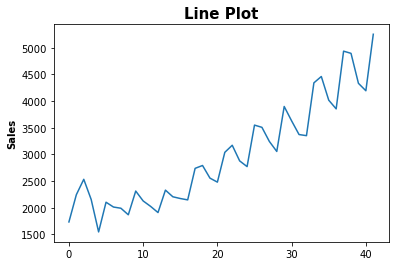

In [6]:
# Visualizing the data
plt.title("Line Plot", size=15, weight='bold')
plt.ylabel("Sales", size=10, weight='bold')
plt.plot(data['Sales'])

In [7]:
quarters=['Q1','Q2','Q3','Q4']
quarters=pd.DataFrame(quarters)
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))
Cocacola=pd.concat([data,Quarters],axis=1)
Cocacola=Cocacola.dropna()
Cocacola.columns=['Quarter','Sales','quarters']

In [8]:
Quarter_dummies=pd.get_dummies(Cocacola['quarters'])
Cocacola=pd.concat([Cocacola,Quarter_dummies],axis=1)
Cocacola['t']=np.arange(1,43)
Cocacola['t_sq']=Cocacola['t']*Cocacola['t']
Cocacola['log_sales']=np.log(Cocacola['Sales'])

In [9]:
Train=Cocacola[0:30]
Test=Cocacola[30:]


In [10]:
#Linear Model 
import statsmodels.formula.api as smf
lin_model=smf.ols('Sales~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Sales']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

714.0144483281297

In [11]:
#Exponential Model 
import statsmodels.formula.api as smf
exp_model=smf.ols('log_sales~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Sales']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

4252.188990972336

In [12]:
#Quadratic Model 
quad_model=smf.ols('Sales~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Sales']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

646.2715428311323

In [13]:
#Additive Seasonality
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_add_sea=Test['Sales']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

1778.0065467941363

In [14]:
#Additive Seasonality Quadratic
add_sea_quad_model=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']])
error_add_sea_quad=Test['Sales']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

586.0533067870459

In [15]:
#Multiplicative Seasonality 
mul_sea_model=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_mul_sea=Test['Sales']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

4252.638677789394

In [16]:
#Multiplicative Additive Seasonality 
mul_add_sea_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Q1','Q2','Q3','Q4']])
error_mul_add_sea=Test['Sales']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

4252.185655793222

In [17]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table

,model,rmse_val
0,lin_model,714.014448
1,exp_model,4252.188991
2,quad_model,646.271543
3,add_sea,1778.006547
4,add_sea_quad,586.053307
5,mul_sea,4252.638678
6,mul_add_sea,4252.185656


#### Additive Seasonality Quadratic is having least rmse
#### So Additive Seasonality Quadratic model is the best model